In [1]:
# General packages
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import datetime as dt
import gnss_lib_py as glp
from datetime import timedelta
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['lines.markersize'] = 0

In [2]:
def read_gps_bindat(filename):
    '''
    read the binary data acquired from by RTK simple broadcast
    '''
    if not os.path.isfile(filename):
        print('ERROR!  File not found: %s' % filename)
        return

    # read the data
    h = open(filename,'rb')
    bindat = h.read()
    h.close()

    # interpret the binary data
    fmt = '<Bdiiiiiiifi'
    nbytes = 45
    names = "STX,timestamp,rpN,rpE,rpD,roll,yaw,pitchIMU,rollIMU,temperature,checksum".split(',')
    data = {}
    for name in names:
        data[name] = []    

    idx = 0
    while idx+nbytes<len(bindat):
        packet = bindat[idx:idx+nbytes]
        dat_list = struct.unpack(fmt,packet)

        if len(dat_list)!=len(names):
            print('ERROR:  Incompatible data.')
            return data

        for datidx,name in enumerate(names):
            data[name].append(dat_list[datidx])

        idx += nbytes

    return data

In [3]:
def date_to_indice(date, data):
    '''
    date : string ('year-month-dayThour:minute:second')
    data : list
    '''
    
    date = dt.datetime.fromisoformat(date)
    for index, idate in enumerate(data):
        if dt.datetime.utcfromtimestamp(idate) == date:
            return index
    return('You have not taken data at this date')

In [4]:
#dat = read_gps_bindat('calsource_orientation.dat')
import pickle
#h = open('calsource_orientation.pkl','rb')
#dat = pickle.load(h)
#h.close()

dat = read_gps_bindat('calsource_orientation.dat')

In [5]:
list(dat)

['STX',
 'timestamp',
 'rpN',
 'rpE',
 'rpD',
 'roll',
 'yaw',
 'pitchIMU',
 'rollIMU',
 'temperature',
 'checksum']

In [6]:
len(dat['timestamp'])

55782

In [7]:
tstamp_first_data = dat['timestamp'][0]
date_first_data = dt.datetime.utcfromtimestamp(tstamp_first_data)

print(date_first_data)

2024-11-20 08:20:52


In [8]:
tstamp_last_data = dat['timestamp'][-1]
date_last_data = dt.datetime.utcfromtimestamp(tstamp_last_data)

print(date_last_data)

2024-11-20 10:26:54.125000


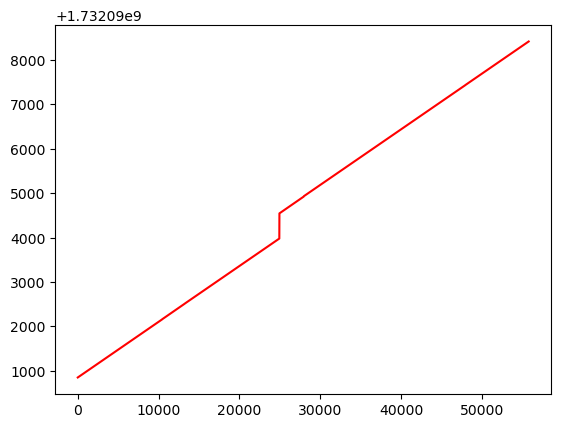

In [9]:
t = np.arange(len(dat['timestamp']))
plt.plot(t, dat['timestamp'], '-r')

In [10]:
len(dat['timestamp'])

55782

In [11]:
print(dt.datetime(year=2024, month=11, day=20, hour=9, minute=40, second=0))

2024-11-20 09:40:00


In [12]:
tstamp_last_data = dat['timestamp'][-1]
print(tstamp_last_data) 
date_last_data = dt.datetime.utcfromtimestamp(tstamp_last_data)

print(date_last_data)

1732098414.125
2024-11-20 10:26:54.125000


In [13]:
index_test = date_to_indice('2024-11-20T10:20:00', dat['timestamp'])
#index_test_alt = date_to_indice('2023-11-29T15:22:00', dat['timestamp'])
minutes = []
for i in range(10):
    idx = date_to_indice(f'2023-11-29T15:0{i}:00', dat['timestamp'])
    minutes.append(idx)
for i in range(10, 22):
    idx = date_to_indice(f'2023-11-29T15:{i}:00', dat['timestamp'])
    minutes.append(idx)

In [14]:
date_to_indice(f'2024-11-20T09:40:00', dat['timestamp'])

33301

In [15]:
index_test

52477

Text(0, 0.5, 'Temperature (°C)')

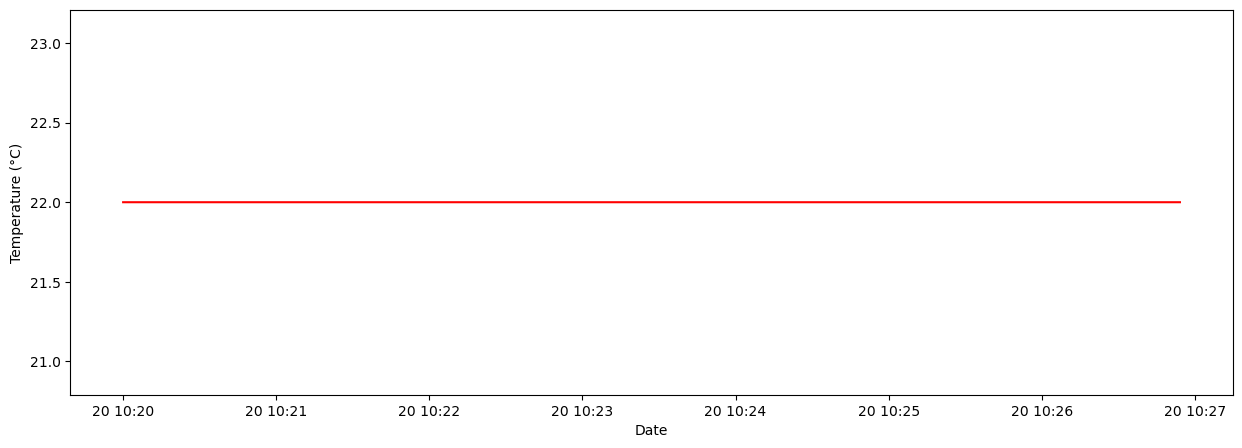

In [16]:
date_axis = []
plt.figure(figsize = (15, 5))
for tstamp in dat['timestamp']:
   date_axis.append(dt.datetime.utcfromtimestamp(tstamp))

plt.plot(date_axis[index_test:], dat['temperature'][index_test:], '-r')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

Text(0, 0.5, 'North component of relative position vector (1 m)')

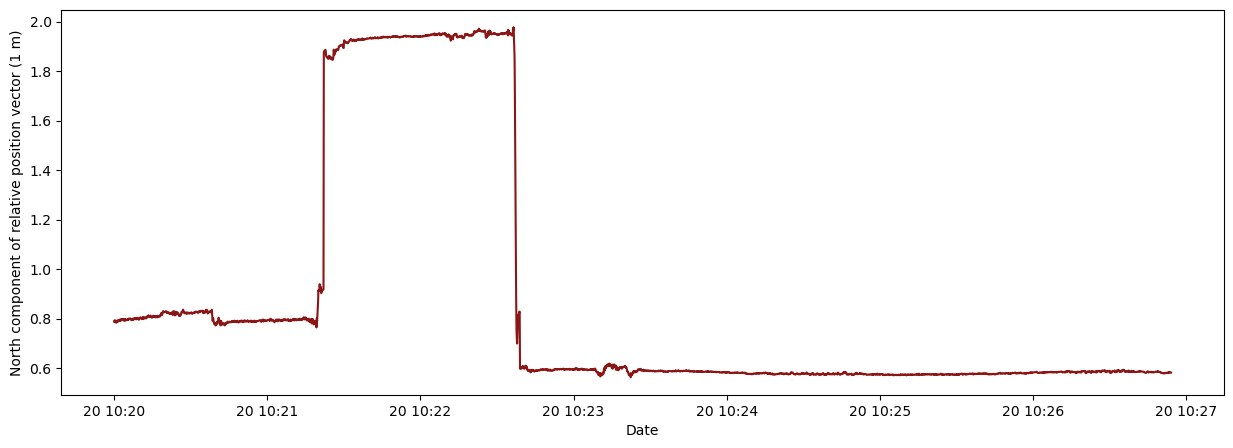

In [17]:
plt.figure(figsize = (15, 5))
rpN = []
for i in range(index_test, len(dat['rpE'])):
    rpN.append(dat['rpN'][i] / 10000)
plt.plot(date_axis[index_test:], rpN)
plt.xlabel('Date')
plt.ylabel('North component of relative position vector (1 m)')

Text(0, 0.5, 'East component of relative position vector (m)')

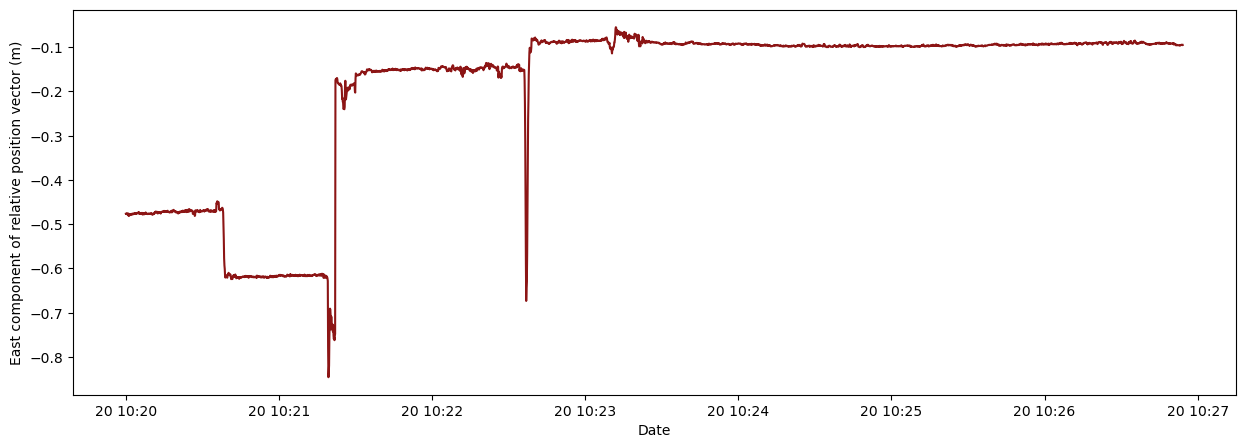

In [18]:
plt.figure(figsize = (15, 5))
rpE = []
for i in range(index_test, len(dat['rpE'])):
    rpE.append(dat['rpE'][i] / 10000)
plt.plot(date_axis[index_test:], rpE)
plt.xlabel('Date')
plt.ylabel('East component of relative position vector (m)')

Text(0, 0.5, 'Down component of relative position vector (m)')

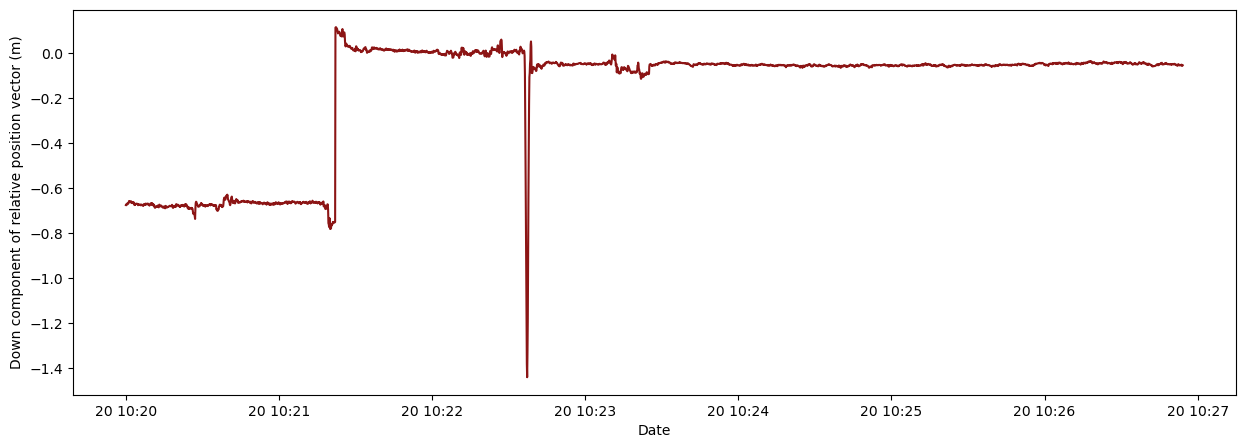

In [19]:
plt.figure(figsize = (15, 5))
rpD = []
for i in range(index_test, len(dat['rpE'])):
    rpD.append(dat['rpD'][i] / 10000)
plt.plot(date_axis[index_test:], rpD)
plt.xlabel('Date')
plt.ylabel('Down component of relative position vector (m)')

Text(0, 0.5, 'Roll angle (deg)')

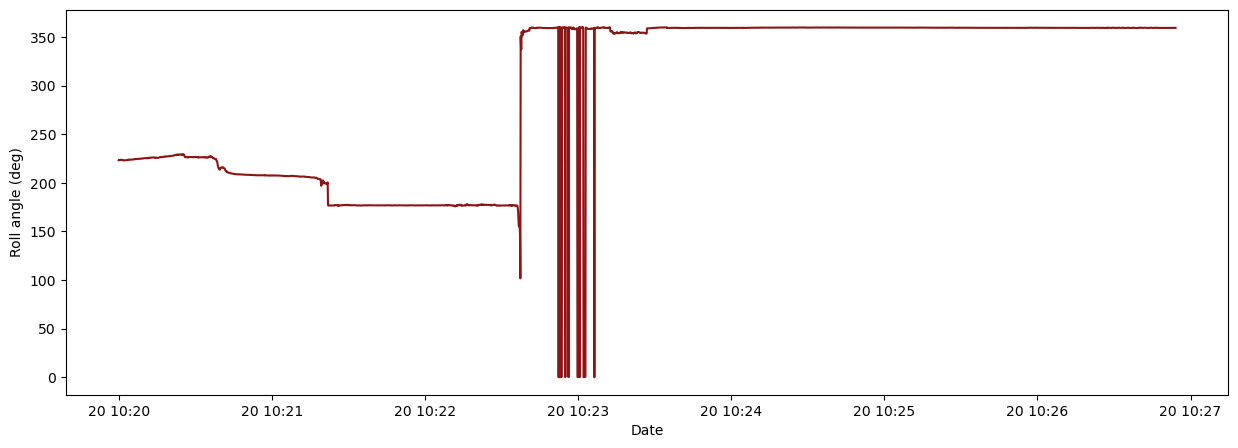

In [20]:
fig, ax = plt.subplots(figsize = (15, 5))
roll = []
for i in range(index_test, len(dat['rpE'])):
    roll.append(dat['roll'][i] / 1000)
ax.plot(date_axis[index_test:], roll)
ax.set_xlabel('Date')
ax.set_ylabel('Roll angle (deg)')

Text(0, 0.5, 'Yaw angle (deg)')

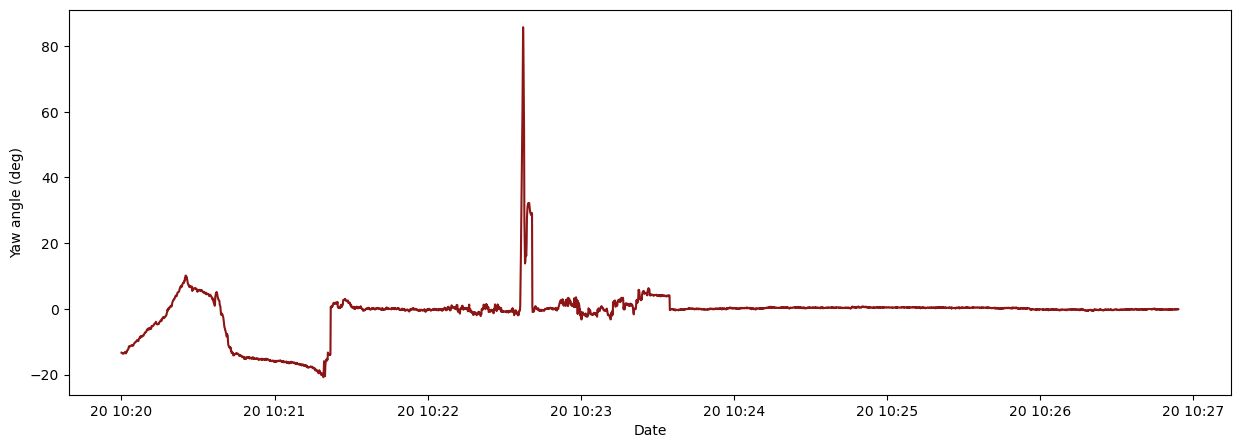

In [21]:
plt.figure(figsize = (15, 5))
yaw = []
for i in range(index_test, len(dat['rpE'])):
    yaw.append(dat['yaw'][i] / 1000)
plt.plot(date_axis[index_test:], yaw)
plt.xlabel('Date')
plt.ylabel('Yaw angle (deg)')

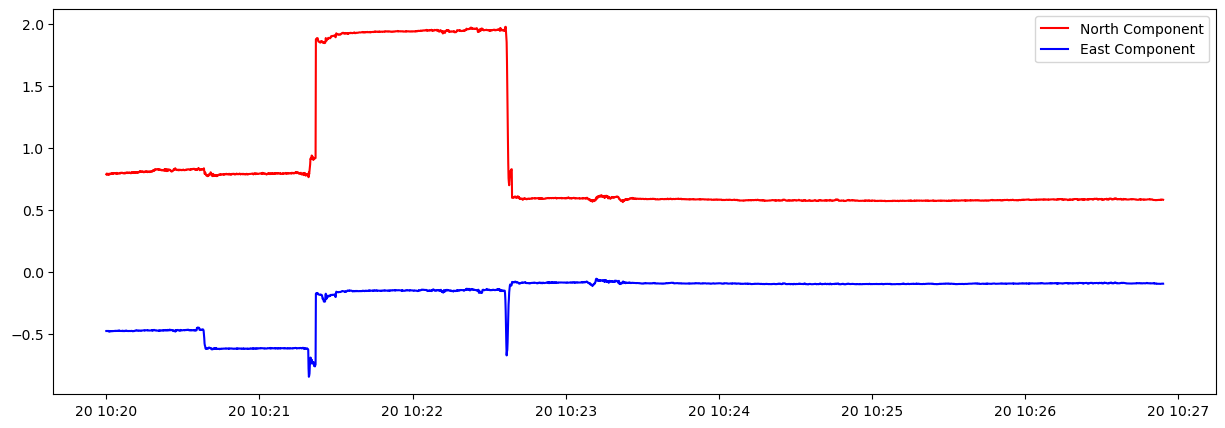

In [22]:
plt.figure(figsize = (15, 5))
plt.plot(date_axis[index_test:], rpN, 'r', label = 'North Component')
plt.plot(date_axis[index_test:], rpE, 'b', label = 'East Component')
plt.legend()

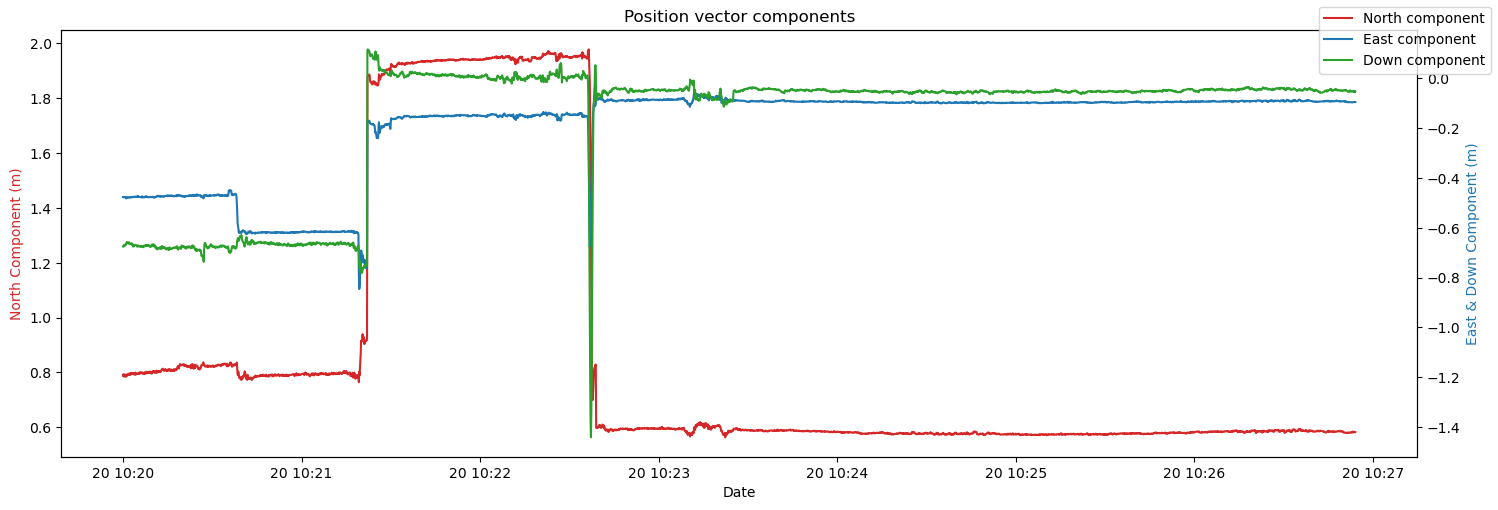

In [23]:
fig, ax1 = plt.subplots(figsize = (15,5))
#mpl.rcParams['lines.marker'] = '*'
#mpl.rcParams['lines.markersize'] = 3



color_r = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('North Component (m)', color = color_r)
ax1.plot(date_axis[index_test:], rpN, color = color_r, label = 'North component')

ax2 = ax1.twinx()

color_b = 'tab:blue'
color_d = 'tab:green'
ax2.set_xlabel('Date')
ax2.set_ylabel('East & Down Component (m)', color = color_b)
ax2.plot(date_axis[index_test:], rpE, color = color_b, label = 'East component')
ax2.plot(date_axis[index_test:], rpD, color = color_d, label = 'Down component')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_title("Position vector components")
fig.legend()
plt.show()

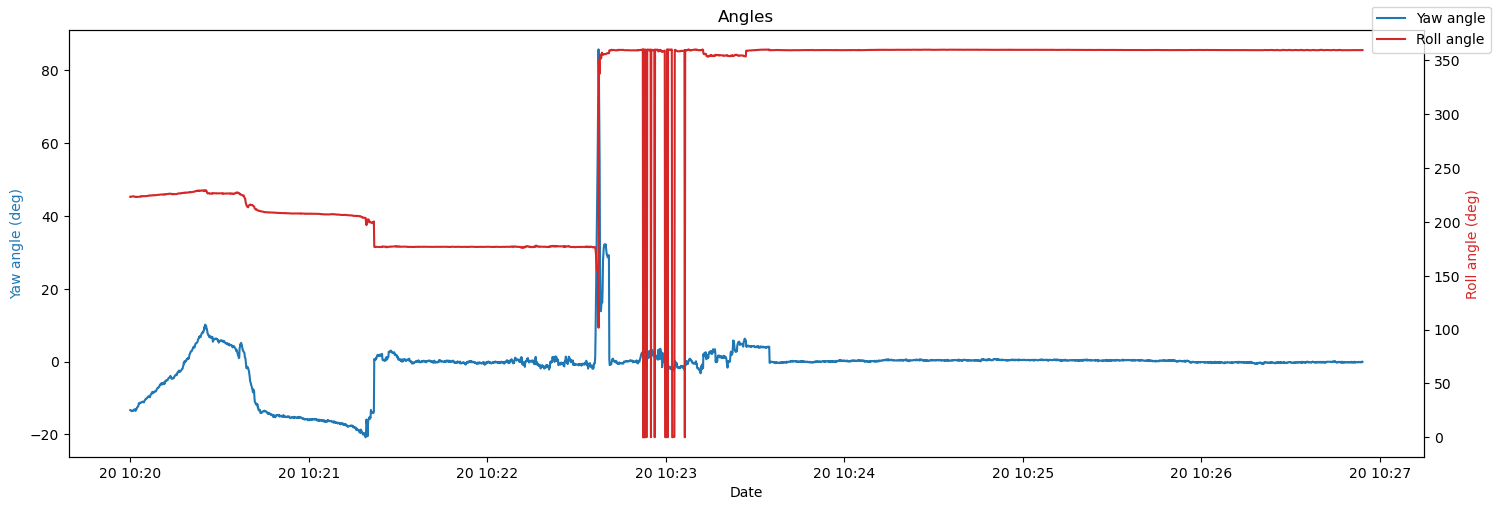

In [24]:
fig, ax1 = plt.subplots(figsize = (15,5))


color_b = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Yaw angle (deg)', color = color_b)
ax1.plot(date_axis[index_test:], yaw, color = color_b, label = 'Yaw angle')

ax2 = ax1.twinx()

color_r = 'tab:red'
ax2.set_xlabel('Date')
ax2.set_ylabel('Roll angle (deg)', color = color_r)
ax2.plot(date_axis[index_test:], roll, color = color_r, label = 'Roll angle')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_title("Angles")
fig.legend()
plt.show()

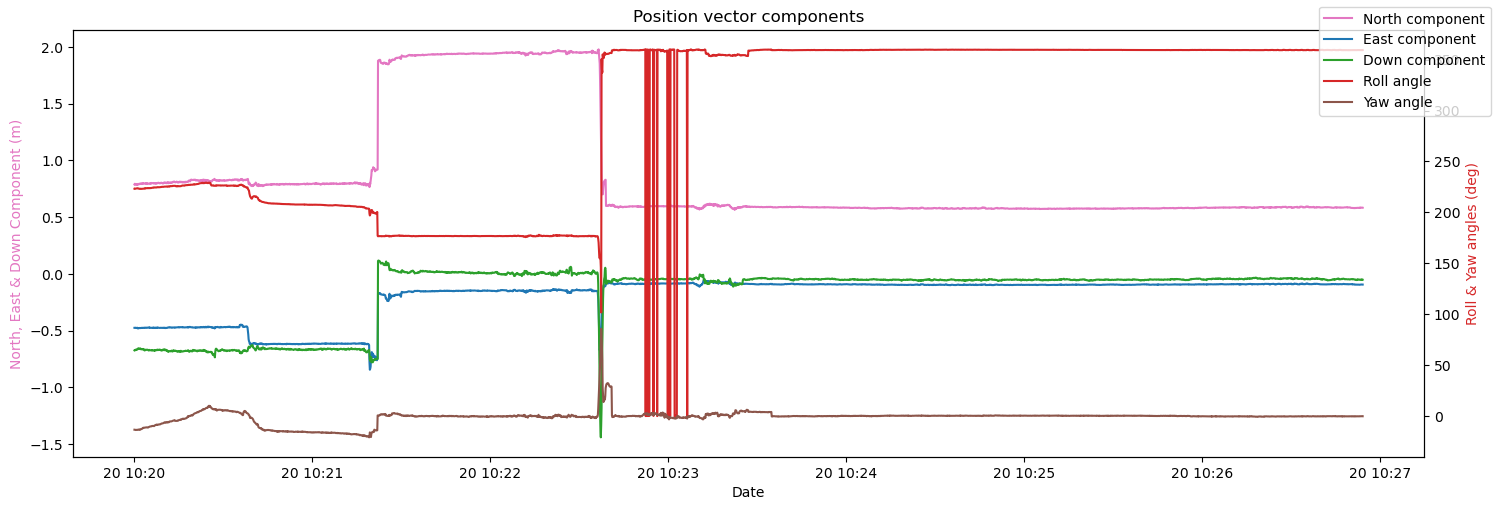

In [26]:
fig, ax1 = plt.subplots(figsize = (15,5))

color_a = 'tab:pink'
color_r = 'tab:red'
color_b = 'tab:blue'
color_d = 'tab:green'
color_c = 'tab:brown'
ax1.set_xlabel('Date')
ax1.set_ylabel('North, East & Down Component (m)', color = color_a)
ax1.plot(date_axis[index_test:], rpN, color = color_a, label = 'North component')
ax1.plot(date_axis[index_test:], rpE, color = color_b, label = 'East component')
ax1.plot(date_axis[index_test:], rpD, color = color_d, label = 'Down component')

ax2 = ax1.twinx()

ax2.plot(date_axis[index_test:], roll, color = color_r, label = 'Roll angle')
ax2.plot(date_axis[index_test:], yaw, color = color_c, label = 'Yaw angle')
ax2.set_xlabel('Date')
ax2.set_ylabel('Roll & Yaw angles (deg)', color = color_r)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_title("Position vector components")
fig.legend()
plt.show()

In [ ]:
ned = []
for i in range(index_test, len(dat['rpN'])):
    ned.append([[dat['rpN'][i]], [dat['rpE'][i]], [dat['rpD'][i]]])

TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
index = 117820

print('N', np.mean(dat['rpN'][index]))
print('E', np.mean(dat['rpE'][(index-10):(index+10)]))
print('D', np.mean(dat['rpD'][(index-10):(index+10)]))
print('roll', dat['roll'][index])

IndexError: list index out of range

In [ ]:
ned

[]

In [ ]:
x_lla_condorcet = np.array([[48.8289964], [2.3835022], [101.2]])
local_frame = glp.LocalCoord.from_geodetic(x_lla_condorcet)
lla = []
for j in range(len(ned)):
    lla.append(local_frame.ned_to_geodetic(np.array(ned[j])/10000))
lla = np.reshape(lla, [np.shape(lla)[0], np.shape(lla)[1]])

IndexError: tuple index out of range

In [ ]:
lla

[]

In [ ]:
np.shape(lla)[0]

0

In [ ]:
nav_data = glp.NavData()
nav_data['lat_*_deg'] = np.zeros(np.shape(lla)[0])
nav_data['lon_*_deg'] = np.zeros(np.shape(lla)[0])

for k in range(np.shape(lla)[0]):
    nav_data['lat_*_deg', k] = lla[k][0]
    nav_data['lon_*_deg', k] = lla[k][1]

In [ ]:
nav_data

Empty NavData
Rows: [lat_*_deg, lon_*_deg]
Index: []

In [ ]:
fig = glp.plot_map(nav_data)
fig.show()

ValueError: max() arg is an empty sequence

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget

X, Y, Z = np.zeros((3, len(dat['rpN'][index_test:index_test+100])))
North, East, Down = [], [], []
for i in range(index_test, index_test+100):
    North.append(dat['rpE'][i] / 10000)
    East.append(dat['rpN'][i] / 10000)
    Down.append(dat['rpD'][i] / 10000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X ,Y, Z, North, East, Down)
ax.set_ylabel('North Component (m)')
ax.set_xlabel('East Component (m)')
ax.set_zlabel('Down Component (m)')
ax.set_xlim([-1, 1])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.2, 0.5])
plt.show()

TypeError: can only concatenate str (not "int") to str

In [ ]:
#%matplotlib widget

X, Y = np.zeros((2, len(dat['rpN'][index_test:])))
North, East = [], []
for i in range(index_test, len(dat['rpN'])):
    North.append(dat['rpN'][i] / 10000)
    East.append(dat['rpE'][i] / 10000)

fig, ax = plt.subplots(figsize=(10,10))
ax.quiver(X ,Y, East, North, angles='xy', scale_units='xy', scale=1)
ax.set_ylabel('North Component (m)')
ax.set_xlabel('East Component (m)')
ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
X, Y = np.zeros((2, len(dat['rpN'][index_test:index_test_alt])))
North, East = [], []
for i in range(index_test, index_test_alt):
    North.append(dat['rpN'][i] / 10000)
    East.append(dat['rpE'][i] / 10000)

fig, ax = plt.subplots(figsize=(10,10))
ax.quiver(X ,Y, East, North, angles='xy', scale_units='xy', scale=1)
ax.set_ylabel('North Component (m)')
ax.set_xlabel('East Component (m)')
ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])
plt.show()

NameError: name 'index_test_alt' is not defined

In [ ]:
#%matplotlib widget

X, Y = np.zeros((2, len(dat['rpN'][index_test:])))
North, East = [], []
for i in range(index_test, len(dat['rpN'])):
    North.append(dat['rpN'][i] / 10000)
    East.append(dat['rpE'][i] / 10000)
    
idx_date = date_to_indice('2023-11-29T15:17:00', dat['timestamp'])

fig, ax = plt.subplots(figsize=(10,10))
ax.quiver(X[0] ,Y[0], East[idx_date - index_test], North[idx_date - index_test], angles='xy', scale_units='xy', scale=1)
ax.set_ylabel('North Component (m)')
ax.set_xlabel('East Component (m)')
ax.set_title("Position vector in North-East plane")
ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
north_vector = [1, 0]
north_vector_unit = north_vector / np.linalg.norm(north_vector)
angles = []

for i in range(index_test_alt - index_test):
    position_vector = [North[i], East[i]]
    position_vector_unit = position_vector / np.linalg.norm(position_vector)

    dot_product = np.dot(position_vector_unit, north_vector_unit)
    angle_deviation = np.arccos(dot_product)
    angles.append(angle_deviation * 180 / np.pi)
print(np.mean(angles))

NameError: name 'index_test_alt' is not defined

In [ ]:
roll_test = []

north_vector = [1, 0]
north_vector_unit = north_vector / np.linalg.norm(north_vector)
angles = []

idx = date_to_indice('2023-11-29T15:20:40', dat['timestamp'])
idx_alt = date_to_indice('2023-11-29T15:22:00', dat['timestamp'])

for i in range(idx_alt - idx):
    position_vector = [North[i], East[i]]
    position_vector_unit = position_vector / np.linalg.norm(position_vector)

    dot_product = np.dot(position_vector_unit, north_vector_unit)
    angle_deviation = np.arccos(dot_product)
    angles.append(angle_deviation * 180 / np.pi)
print(np.mean(angles))


for i in range(idx, idx_alt):
    roll_test.append((dat['roll'][i] / 1000) - np.mean(angles))
print(np.mean(roll_test))
plt.plot(roll_test)

TypeError: unsupported operand type(s) for -: 'str' and 'str'